In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# loading the data set
df = pd.read_csv('/content/mail_data.csv')

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
# cheking for null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# label encoding
df = df.replace({'Category': {'ham': 1, 'spam': 0}})

In [ ]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


**Stemming**

In [ ]:
porter_stem = PorterStemmer()

In [ ]:
import re
def stemming(mail):
  stemmed_mail = re.sub('[^a-zA-Z]', ' ', mail)
  stemmed_mail = stemmed_mail.lower()
  stemmed_mail = stemmed_mail.split()
  stemmed_mail = [porter_stem.stem(word) for word in stemmed_mail if not word in stopwords.words('english')]
  stemmed_mail = ' '.join(stemmed_mail)
  return stemmed_mail

In [ ]:
df['Message'] = df.Message.apply(stemming)

In [ ]:
print(df.Message)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


In [ ]:
X = df['Message'].values
y = df['Category'].values

In [ ]:
print(y)

[1 1 0 ... 1 1 1]


In [ ]:
# tranforming text into feature vectors
vectorizer = TfidfVectorizer(min_df = 1)
X = vectorizer.fit_transform(X)
print(X)

  (0, 5957)	0.19460776670194488
  (0, 190)	0.3522946643655987
  (0, 2208)	0.1649859743034801
  (0, 964)	0.29761995607435426
  (0, 736)	0.33630333732147566
  (0, 2932)	0.28506031120996994
  (0, 6135)	0.23616756554565888
  (0, 2245)	0.19460776670194488
  (0, 738)	0.29761995607435426
  (0, 379)	0.26350491969128115
  (0, 1169)	0.27282796669086984
  (0, 4091)	0.24055424511726686
  (0, 2827)	0.3522946643655987
  (0, 2171)	0.14066343975170745
  (1, 3785)	0.564793662023427
  (1, 6056)	0.44597659211687757
  (1, 2794)	0.4745440766926726
  (1, 2960)	0.4218982744467187
  (1, 3760)	0.2809319560263009
  (2, 262)	0.18752116579572622
  (2, 4364)	0.18116211299660373
  (2, 5695)	0.13727833879237866
  (2, 5131)	0.22058857181065877
  (2, 4319)	0.18498071794442764
  (2, 4402)	0.18116211299660373
  :	:
  (5567, 3972)	0.2706069316559098
  (5567, 4364)	0.2860360482126314
  (5568, 1704)	0.6652366917601374
  (5568, 1996)	0.5740672391289212
  (5568, 2457)	0.37457404553349233
  (5568, 2171)	0.29597505521175127
  

In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
train_data_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, train_data_pred)
print(accuracy_train)

0.9728516939645502


In [ ]:
test_data_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, test_data_pred)
print(accuracy_test)

0.9551569506726457


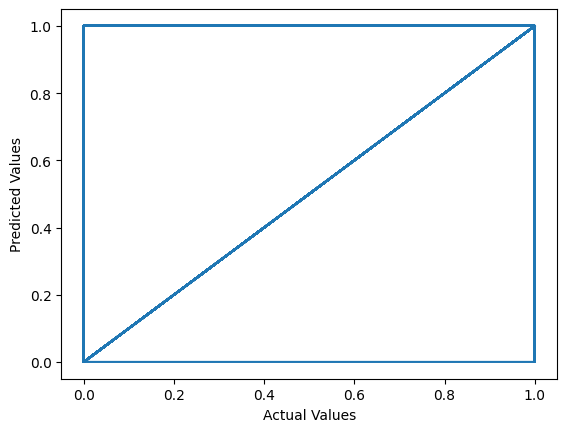

In [ ]:
import matplotlib.pyplot as plt
plt.plot( y_test, test_data_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
input_mail = input('Tell me the mail you got: ')

mail_stemmed = stemming(input_mail)

feature_vectors = vectorizer.transform([mail_stemmed])

prediction = model.predict(feature_vectors)

print(prediction)

if prediction[0] == 0:
  print('Mail is Spam')

else:
  print('Mail is Ham')

Tell me the mail you got: We tried to contact you re your reply to our offer of 750 mins 150 textand a new video phone call 08002988890 now or reply for free delivery tomorrow
[0]
Mail is Spam
